In [101]:
import requests
import pandas as pd
import numpy as np; np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
import csv

def get_results(start_index, cuisines):
    headers = {
        'Accept': 'application/json',
        'user-key': '4acc54ca3cf4e3c53521751bd0a2ca40',
    }

    params = (
        ('entity_id', '305'),
        ('entity_type', 'city'),
        ('start', start_index ),
        ('cuisines', cuisines)
    )
    
    url = 'https://developers.zomato.com/api/v2.1/search'
    response = requests.get(url, headers=headers, params=params)
    return response.json()

all_results = []
cuisines_list = [1,177,168,955,227]
for cuisine in cuisines_list:
    for x in range(0, 100, 20):
        try:
            temp_result = get_results(x, cuisine)
            all_results.append(temp_result)
        
        except Exception as e:
            print(e, x)

In [102]:
for_df = []

for row in all_results:
    for restaurant in row.get('restaurants'):
        for_df.append(restaurant.get('restaurant'))
        
    
df = pd.DataFrame.from_records(for_df)

df['res_id'] = df['R'].map(lambda x: x.get('res_id'))
df['lat'] = df['location'].map(lambda x: x.get('latitude'))
df['lng'] = df['location'].map(lambda x: x.get('longitude'))
df['aggregate_rating'] = df['user_rating'].map(lambda x: x.get('aggregate_rating'))
df['rating_text'] = df['user_rating'].map(lambda x: x.get('rating_text'))
df['votes'] = df['user_rating'].map(lambda x: x.get('votes'))
df['FirstCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[0]
df['SecondCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[1]
df['ThirdCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[2]
df['FourthCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[3]

keep = ['res_id', 'name', 'lat','lng','cuisines','aggregate_rating','rating_text','votes','FirstCuisine','SecondCuisine','ThirdCuisine','FourthCuisine']
full_df = df[keep].copy()
full_df

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine
0,16971711,Snooze,39.7556527778,-104.9889972222,American,4.7,Excellent,642,American,None,None,None
1,16971985,Steuben's Food Service,39.7433166667,-104.9804694444,American,4.7,Excellent,689,American,None,None,None
2,16973602,Root Down,39.7631694444,-105.0056138889,"American, Tapas",4.8,Excellent,480,American,Tapas,None,None
3,16973012,Wynkoop,39.7533500000,-104.9985300000,"American, Burger, Bar Food",4.4,Very Good,420,American,Burger,Bar Food,None
4,16974402,Euclid Hall,39.7477200000,-104.9999900000,"Bar Food, American",4.5,Excellent,382,Bar Food,American,None,None
5,16973776,Park Burger,39.6822750000,-104.9804472222,"American, Burger",4.9,Excellent,256,American,Burger,None,None
6,16971517,Sam's No. 3 Downtown,39.7463200000,-104.9954400000,"American, Diner",4.3,Very Good,278,American,Diner,None,None
7,16970329,My Brother's Bar,39.7563250000,-105.0092388889,"American, Bar Food",4.7,Excellent,274,American,Bar Food,None,None
8,16971396,Rock Bottom Brewery - Denver,39.7472700000,-104.9947500000,"American, Bar Food",4.1,Very Good,220,American,Bar Food,None,None
9,16971274,Racines,39.7265638889,-104.9848472222,American,4.3,Very Good,270,American,None,None,None


In [103]:
csv = "full_df.csv"

full_csv = pd.read_csv(csv)
full_csv

,Unnamed: 0,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine
0,0,16971711,Snooze,39.755653,-104.988997,American,4.7,Excellent,642,American,NaN,NaN,NaN
1,1,16971985,Steuben's Food Service,39.743317,-104.980469,American,4.7,Excellent,689,American,NaN,NaN,NaN
2,2,16973602,Root Down,39.763169,-105.005614,"American, Tapas",4.8,Excellent,480,American,Tapas,NaN,NaN
3,3,16973012,Wynkoop,39.753350,-104.998530,"American, Burger, Bar Food",4.4,Very Good,420,American,Burger,Bar Food,NaN
4,4,16974402,Euclid Hall,39.747720,-104.999990,"Bar Food, American",4.5,Excellent,382,Bar Food,American,NaN,NaN
5,5,16973776,Park Burger,39.682275,-104.980447,"American, Burger",4.9,Excellent,256,American,Burger,NaN,NaN
6,6,16971517,Sam's No. 3 Downtown,39.746320,-104.995440,"American, Diner",4.3,Very Good,278,American,Diner,NaN,NaN
7,7,16970329,My Brother's Bar,39.756325,-105.009239,"American, Bar Food",4.7,Excellent,274,American,Bar Food,NaN,NaN
8,8,16971396,Rock Bottom Brewery - Denver,39.747270,-104.994750,"American, Bar Food",4.1,Very Good,220,American,Bar Food,NaN,NaN
9,9,16971274,Racines,39.726564,-104.984847,American,4.3,Very Good,270,American,NaN,NaN,NaN


In [104]:
full_csv.columns

Index(['Unnamed: 0', 'res_id', 'name', 'lat', 'lng', 'cuisines',
       'aggregate_rating', 'rating_text', 'votes', 'FirstCuisine',
       'SecondCuisine', 'ThirdCuisine', 'FourthCuisine'],
      dtype='object')

In [105]:
american_cuisine = full_df.loc[full_df['FirstCuisine'] == 'American']
american_cuisine

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine
0,16971711,Snooze,39.7556527778,-104.9889972222,American,4.7,Excellent,642,American,None,None,None
1,16971985,Steuben's Food Service,39.7433166667,-104.9804694444,American,4.7,Excellent,689,American,None,None,None
2,16973602,Root Down,39.7631694444,-105.0056138889,"American, Tapas",4.8,Excellent,480,American,Tapas,None,None
3,16973012,Wynkoop,39.7533500000,-104.9985300000,"American, Burger, Bar Food",4.4,Very Good,420,American,Burger,Bar Food,None
5,16973776,Park Burger,39.6822750000,-104.9804472222,"American, Burger",4.9,Excellent,256,American,Burger,None,None
6,16971517,Sam's No. 3 Downtown,39.7463200000,-104.9954400000,"American, Diner",4.3,Very Good,278,American,Diner,None,None
7,16970329,My Brother's Bar,39.7563250000,-105.0092388889,"American, Bar Food",4.7,Excellent,274,American,Bar Food,None,None
8,16971396,Rock Bottom Brewery - Denver,39.7472700000,-104.9947500000,"American, Bar Food",4.1,Very Good,220,American,Bar Food,None,None
9,16971274,Racines,39.7265638889,-104.9848472222,American,4.3,Very Good,270,American,None,None,None
10,16973987,Snooze,39.7275305556,-104.9405361111,American,4.4,Very Good,209,American,None,None,None


In [106]:
# trying to separate this into 5 separate cuisines
def get_results(start_index, cuisines):
    headers = {
        'Accept': 'application/json',
        'user-key': '4acc54ca3cf4e3c53521751bd0a2ca40',
    }

    params = (
        ('entity_id', '305'),
        ('entity_type', 'city'),
        ('start', start_index ),
#         ('cuisines', cuisines)
    )
    
    url = 'https://developers.zomato.com/api/v2.1/search'
    response = requests.get(url, headers=headers, params=params)
    return response.json()

all_results = []
cuisines_list = [1]
#                  ,177,168,955,227]

for cuisine in cuisines_list:
    for x in range(0, 500, 20):
        try:
            temp_result = get_results(x, cuisine)
            all_results.append(temp_result)
        
        except Exception as e:
            print(e, x)

In [114]:
for_df = []

for row in all_results:
    for restaurant in row.get('restaurants'):
        for_df.append(restaurant.get('restaurant'))
        
    
df = pd.DataFrame.from_records(for_df)

df['res_id'] = df['R'].map(lambda x: x.get('res_id'))
df['lat'] = df['location'].map(lambda x: x.get('latitude'))
df['lng'] = df['location'].map(lambda x: x.get('longitude'))
df['aggregate_rating'] = df['user_rating'].map(lambda x: x.get('aggregate_rating'))
df['rating_text'] = df['user_rating'].map(lambda x: x.get('rating_text'))
df['votes'] = df['user_rating'].map(lambda x: x.get('votes'))
df['FirstCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[0]
df['SecondCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[1]
df['ThirdCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[2]
df['FourthCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[3]

keep = ['res_id', 'name', 'lat','lng','cuisines','aggregate_rating','rating_text','votes','FirstCuisine','SecondCuisine','ThirdCuisine','FourthCuisine']
newdf_american = df[keep].copy()
newdf_american

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine
0,16971711,Snooze,39.7556527778,-104.9889972222,American,4.7,Excellent,642,American,None,None,None
1,16967791,Cherry Cricket,39.7194800000,-104.9567300000,"American, Burger, Mexican",4.7,Excellent,865,American,Burger,Mexican,None
2,16971985,Steuben's Food Service,39.7433166667,-104.9804694444,American,4.7,Excellent,689,American,None,None,None
3,16972224,Sushi Den,39.6895611111,-104.9804833333,"Japanese, Sushi",4.8,Excellent,571,Japanese,Sushi,None,None
4,16973602,Root Down,39.7631694444,-105.0056138889,"American, Tapas",4.8,Excellent,480,American,Tapas,None,None
5,16972712,Vesta,39.7525500000,-104.9964100000,New American,4.6,Excellent,461,New American,None,None,None
6,16974750,Linger,39.7595972222,-105.0114444444,"American, Asian, European",4.4,Very Good,362,American,Asian,European,None
7,16971385,Rioja,39.7477638889,-104.9993138889,Mediterranean,4.5,Excellent,426,Mediterranean,None,None,None
8,16973071,Osteria Marco,39.7476700000,-104.9995300000,Italian,4.9,Excellent,446,Italian,None,None,None
9,16974402,Euclid Hall,39.7477200000,-104.9999900000,"Bar Food, American",4.5,Excellent,382,Bar Food,American,None,None


In [115]:
American_df1 = newdf_american[(full_df['FirstCuisine'] == 'American')]
American_df2 = newdf_american[(full_df['SecondCuisine'] == 'American')]
American_df3 = newdf_american[(full_df['ThirdCuisine'] == 'American')]
American_df4 = newdf_american[(full_df['FourthCuisine'] == 'American')]

American_merged_df = pd.concat([American_df1, American_df2, American_df3, American_df4])

American_merged_df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine
0,16971711,Snooze,39.7556527778,-104.9889972222,American,4.7,Excellent,642,American,None,None,None
1,16967791,Cherry Cricket,39.7194800000,-104.9567300000,"American, Burger, Mexican",4.7,Excellent,865,American,Burger,Mexican,None
2,16971985,Steuben's Food Service,39.7433166667,-104.9804694444,American,4.7,Excellent,689,American,None,None,None
3,16972224,Sushi Den,39.6895611111,-104.9804833333,"Japanese, Sushi",4.8,Excellent,571,Japanese,Sushi,None,None
5,16972712,Vesta,39.7525500000,-104.9964100000,New American,4.6,Excellent,461,New American,None,None,None
6,16974750,Linger,39.7595972222,-105.0114444444,"American, Asian, European",4.4,Very Good,362,American,Asian,European,None
7,16971385,Rioja,39.7477638889,-104.9993138889,Mediterranean,4.5,Excellent,426,Mediterranean,None,None,None
8,16973071,Osteria Marco,39.7476700000,-104.9995300000,Italian,4.9,Excellent,446,Italian,None,None,None
9,16974402,Euclid Hall,39.7477200000,-104.9999900000,"Bar Food, American",4.5,Excellent,382,Bar Food,American,None,None
10,16973012,Wynkoop,39.7533500000,-104.9985300000,"American, Burger, Bar Food",4.4,Very Good,420,American,Burger,Bar Food,None


In [82]:
American_merged_df.count()

res_id              191
name                191
FirstCuisine        191
SecondCuisine       156
ThirdCuisine         62
FourthCuisine         0
lat                 191
lng                 191
aggregate_rating    191
rating_text         191
votes               191
dtype: int64

In [83]:
Sushi_df2 = full_df[(full_df['FirstCuisine'] == 'Sushi') | (full_df['SecondCuisine'] == 'Sushi')
                      | (full_df['ThirdCuisine'] == 'Sushi')| (full_df['FourthCuisine'] == 'Sushi')]
Sushi_df2

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine
101,16972233,Sushi Sasa,39.7569200000,-105.0091800000,"Sushi, Japanese",4.6,Excellent,282,Sushi,Japanese,None,None
106,16973066,Wasabi Sushi Bar,39.7084583333,-105.0773694444,"Sushi, Japanese",4.2,Very Good,100,Sushi,Japanese,None,None
116,16972234,Sushi Tazu,39.7210111111,-104.9530944444,"Sushi, Japanese",4.1,Very Good,71,Sushi,Japanese,None,None
121,16969395,Jing,39.6190611111,-104.9007250000,"Sushi, Asian",3.9,Good,52,Sushi,Asian,None,None
123,16973108,Sushi Train,39.6541370000,-104.9149870000,"Sushi, Japanese",4.0,Very Good,39,Sushi,Japanese,None,None
125,16970597,Osaka Sushi,39.7036333333,-104.9415972222,"Sushi, Japanese",3.8,Good,30,Sushi,Japanese,None,None
128,16973747,Taki Sushi,39.7146750000,-104.9822150000,"Sushi, Japanese",4.2,Very Good,58,Sushi,Japanese,None,None
131,16969949,95a Bistro and Sushi,40.0142333333,-105.1296694444,"Sushi, Tapas",3.9,Good,35,Sushi,Tapas,None,None
134,16972928,Wild Basil,39.5668416667,-104.9242638889,"Sushi, Thai",4.2,Very Good,42,Sushi,Thai,None,None
137,16973741,Blue Fin Sushi,39.7581250000,-104.9027777778,"Sushi, Japanese, Asian",3.5,Good,50,Sushi,Japanese,Asian,None


In [84]:
def get_results(start_index, cuisines):
    headers = {
        'Accept': 'application/json',
        'user-key': '4acc54ca3cf4e3c53521751bd0a2ca40',
    }

    params = (
        ('entity_id', '305'),
        ('entity_type', 'city'),
        ('start', start_index ),
        ('cuisines', cuisines)
    )
    
    url = 'https://developers.zomato.com/api/v2.1/search'
    response = requests.get(url, headers=headers, params=params)
    return response.json()

all_results = []
cuisines_list = [177]
#                  ,168,995,227]

for cuisine in cuisines_list:
    for x in range(0, 100, 20):
        try:
            temp_result = get_results(x, cuisine)
            all_results.append(temp_result)
        
        except Exception as e:
            print(e, x)

In [116]:
for_df = []

for row in all_results:
    for restaurant in row.get('restaurants'):
        for_df.append(restaurant.get('restaurant'))
        
    
df = pd.DataFrame.from_records(for_df)

df['res_id'] = df['R'].map(lambda x: x.get('res_id'))
df['lat'] = df['location'].map(lambda x: x.get('latitude'))
df['lng'] = df['location'].map(lambda x: x.get('longitude'))
df['aggregate_rating'] = df['user_rating'].map(lambda x: x.get('aggregate_rating'))
df['rating_text'] = df['user_rating'].map(lambda x: x.get('rating_text'))
df['votes'] = df['user_rating'].map(lambda x: x.get('votes'))
df['FirstCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[0]
df['SecondCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[1]
df['ThirdCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[2]
df['FourthCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[3]

keep = ['res_id', 'name', 'lat','lng','cuisines','aggregate_rating','rating_text','votes','FirstCuisine','SecondCuisine','ThirdCuisine','FourthCuisine']
newdf_sushi = df[keep].copy()
newdf_sushi

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine
0,16971711,Snooze,39.7556527778,-104.9889972222,American,4.7,Excellent,642,American,None,None,None
1,16967791,Cherry Cricket,39.7194800000,-104.9567300000,"American, Burger, Mexican",4.7,Excellent,865,American,Burger,Mexican,None
2,16971985,Steuben's Food Service,39.7433166667,-104.9804694444,American,4.7,Excellent,689,American,None,None,None
3,16972224,Sushi Den,39.6895611111,-104.9804833333,"Japanese, Sushi",4.8,Excellent,571,Japanese,Sushi,None,None
4,16973602,Root Down,39.7631694444,-105.0056138889,"American, Tapas",4.8,Excellent,480,American,Tapas,None,None
5,16972712,Vesta,39.7525500000,-104.9964100000,New American,4.6,Excellent,461,New American,None,None,None
6,16974750,Linger,39.7595972222,-105.0114444444,"American, Asian, European",4.4,Very Good,362,American,Asian,European,None
7,16971385,Rioja,39.7477638889,-104.9993138889,Mediterranean,4.5,Excellent,426,Mediterranean,None,None,None
8,16973071,Osteria Marco,39.7476700000,-104.9995300000,Italian,4.9,Excellent,446,Italian,None,None,None
9,16974402,Euclid Hall,39.7477200000,-104.9999900000,"Bar Food, American",4.5,Excellent,382,Bar Food,American,None,None


In [118]:
Sushi_df1 = newdf_sushi[(full_df['FirstCuisine'] == 'Sushi')]
Sushi_df2 = newdf_sushi[(full_df['SecondCuisine'] == 'Sushi')]
Sushi_df3 = newdf_sushi[(full_df['ThirdCuisine'] == 'Sushi')]
Sushi_df4 = newdf_sushi[(full_df['FourthCuisine'] == 'Sushi')]

Sushi_merged_df = pd.concat([Sushi_df1, Sushi_df2, Sushi_df3, Sushi_df4])

Sushi_merged_df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine


In [119]:
Sushi_merged_df.count()

res_id              0
name                0
lat                 0
lng                 0
cuisines            0
aggregate_rating    0
rating_text         0
votes               0
FirstCuisine        0
SecondCuisine       0
ThirdCuisine        0
FourthCuisine       0
dtype: int64

In [88]:
def get_results(start_index, cuisines):
    headers = {
        'Accept': 'application/json',
        'user-key': '4acc54ca3cf4e3c53521751bd0a2ca40',
    }

    params = (
        ('entity_id', '305'),
        ('entity_type', 'city'),
        ('start', start_index ),
        ('cuisines', cuisines)
    )
    
    url = 'https://developers.zomato.com/api/v2.1/search'
    response = requests.get(url, headers=headers, params=params)
    return response.json()

all_results = []
cuisines_list = [168]

for cuisine in cuisines_list:
    for x in range(0, 100, 20):
        try:
            temp_result = get_results(x, cuisine)
            all_results.append(temp_result)
        
        except Exception as e:
            print(e, x)

In [122]:
for_df = []

for row in all_results:
    for restaurant in row.get('restaurants'):
        for_df.append(restaurant.get('restaurant'))
        
    
df = pd.DataFrame.from_records(for_df)

df['res_id'] = df['R'].map(lambda x: x.get('res_id'))
df['lat'] = df['location'].map(lambda x: x.get('latitude'))
df['lng'] = df['location'].map(lambda x: x.get('longitude'))
df['aggregate_rating'] = df['user_rating'].map(lambda x: x.get('aggregate_rating'))
df['rating_text'] = df['user_rating'].map(lambda x: x.get('rating_text'))
df['votes'] = df['user_rating'].map(lambda x: x.get('votes'))
df['FirstCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[0]
df['SecondCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[1]
df['ThirdCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[2]
df['FourthCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[3]

keep = ['res_id', 'name', 'lat','lng','cuisines','aggregate_rating','rating_text','votes','FirstCuisine','SecondCuisine','ThirdCuisine','FourthCuisine']
newdf_burger = df[keep].copy()
newdf_burger

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine
0,16971711,Snooze,39.7556527778,-104.9889972222,American,4.7,Excellent,642,American,None,None,None
1,16967791,Cherry Cricket,39.7194800000,-104.9567300000,"American, Burger, Mexican",4.7,Excellent,865,American,Burger,Mexican,None
2,16971985,Steuben's Food Service,39.7433166667,-104.9804694444,American,4.7,Excellent,689,American,None,None,None
3,16972224,Sushi Den,39.6895611111,-104.9804833333,"Japanese, Sushi",4.8,Excellent,571,Japanese,Sushi,None,None
4,16973602,Root Down,39.7631694444,-105.0056138889,"American, Tapas",4.8,Excellent,480,American,Tapas,None,None
5,16972712,Vesta,39.7525500000,-104.9964100000,New American,4.6,Excellent,461,New American,None,None,None
6,16974750,Linger,39.7595972222,-105.0114444444,"American, Asian, European",4.4,Very Good,362,American,Asian,European,None
7,16971385,Rioja,39.7477638889,-104.9993138889,Mediterranean,4.5,Excellent,426,Mediterranean,None,None,None
8,16973071,Osteria Marco,39.7476700000,-104.9995300000,Italian,4.9,Excellent,446,Italian,None,None,None
9,16974402,Euclid Hall,39.7477200000,-104.9999900000,"Bar Food, American",4.5,Excellent,382,Bar Food,American,None,None


In [121]:
# these were running until I changed the data above... UGH
Burger_df1 = newdf_burger[(full_df['FirstCuisine'] == 'Burger')]
Burger_df2 = newdf_burger[(full_df['SecondCuisine'] == 'Burger')]
Burger_df3 = newdf_burger[(full_df['ThirdCuisine'] == 'Burger')]
Burger_df4 = newdf_burger[(full_df['FourthCuisine'] == 'Burger')]

Burger_merged_df = pd.concat([Burger_df1, Burger_df2, Burger_df3, Burger_df4])

Burger_merged_df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine
12,16969848,Lola Mexican Fish House,39.7592204112,-105.0107693883,Mexican,4.3,Very Good,309,Mexican,None,None,None
18,16970715,Panzano,39.7478425015,-104.9927423971,"Italian, Pizza",4.1,Very Good,206,Italian,Pizza,None,None
99,16967581,Cafe Brazil,39.7770416667,-105.0345777778,"Brazilian, South American",4.2,Very Good,116,Brazilian,South American,None,None


In [91]:
Burger_merged_df.count()

res_id              47
name                47
cuisines            47
FirstCuisine        47
SecondCuisine       33
ThirdCuisine        11
FourthCuisine        3
lat                 47
lng                 47
aggregate_rating    47
rating_text         47
votes               47
dtype: int64

In [92]:
Bagel_df2 = df[(full_df['FirstCuisine'] == 'Bagel') | (full_df['SecondCuisine'] == 'Bagel')
                      | (full_df['ThirdCuisine'] == 'Bagel')| (full_df['FourthCuisine'] == 'Bagel')]
Bagel_df2

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine


In [93]:
def get_results(start_index, cuisines):
    headers = {
        'Accept': 'application/json',
        'user-key': '4acc54ca3cf4e3c53521751bd0a2ca40',
    }

    params = (
        ('entity_id', '305'),
        ('entity_type', 'city'),
        ('start', start_index ),
        ('cuisines', cuisines)
    )
    
    url = 'https://developers.zomato.com/api/v2.1/search'
    response = requests.get(url, headers=headers, params=params)
    return response.json()

all_results = []
cuisines_list = [955]

for cuisine in cuisines_list:
    for x in range(0, 100, 20):
        try:
            temp_result = get_results(x, cuisine)
            all_results.append(temp_result)
        
        except Exception as e:
            print(e, x)

In [123]:
for_df = []

for row in all_results:
    for restaurant in row.get('restaurants'):
        for_df.append(restaurant.get('restaurant'))
        
    
df = pd.DataFrame.from_records(for_df)

df['res_id'] = df['R'].map(lambda x: x.get('res_id'))
df['lat'] = df['location'].map(lambda x: x.get('latitude'))
df['lng'] = df['location'].map(lambda x: x.get('longitude'))
df['aggregate_rating'] = df['user_rating'].map(lambda x: x.get('aggregate_rating'))
df['rating_text'] = df['user_rating'].map(lambda x: x.get('rating_text'))
df['votes'] = df['user_rating'].map(lambda x: x.get('votes'))

df['FirstCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[0]
df['SecondCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[1]
df['ThirdCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[2]
df['FourthCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[3]

keep = ['res_id', 'name', 'lat','lng','cuisines','aggregate_rating','rating_text','votes','FirstCuisine','SecondCuisine','ThirdCuisine','FourthCuisine']

newdf_bagel = df[keep].copy()

newdf_bagel

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine
0,16971711,Snooze,39.7556527778,-104.9889972222,American,4.7,Excellent,642,American,None,None,None
1,16967791,Cherry Cricket,39.7194800000,-104.9567300000,"American, Burger, Mexican",4.7,Excellent,865,American,Burger,Mexican,None
2,16971985,Steuben's Food Service,39.7433166667,-104.9804694444,American,4.7,Excellent,689,American,None,None,None
3,16972224,Sushi Den,39.6895611111,-104.9804833333,"Japanese, Sushi",4.8,Excellent,571,Japanese,Sushi,None,None
4,16973602,Root Down,39.7631694444,-105.0056138889,"American, Tapas",4.8,Excellent,480,American,Tapas,None,None
5,16972712,Vesta,39.7525500000,-104.9964100000,New American,4.6,Excellent,461,New American,None,None,None
6,16974750,Linger,39.7595972222,-105.0114444444,"American, Asian, European",4.4,Very Good,362,American,Asian,European,None
7,16971385,Rioja,39.7477638889,-104.9993138889,Mediterranean,4.5,Excellent,426,Mediterranean,None,None,None
8,16973071,Osteria Marco,39.7476700000,-104.9995300000,Italian,4.9,Excellent,446,Italian,None,None,None
9,16974402,Euclid Hall,39.7477200000,-104.9999900000,"Bar Food, American",4.5,Excellent,382,Bar Food,American,None,None


In [124]:
Bagel_1 = newdf_bagel[(full_df['FirstCuisine'] == 'Bagel')]
Bagel_2 = newdf_bagel[(full_df['SecondCuisine'] == 'Bagel')]
Bagel_3 = newdf_bagel[(full_df['ThirdCuisine'] == 'Bagel')]
Bagel_4 = newdf_bagel[(full_df['FourthCuisine'] == 'Bagel')]

Bagel_merged_df = pd.concat([Bagel_df1, Bagel_df2, Bagel_df3, Bagel_df4])

Bagel_merged_df


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes


In [96]:
def get_results(start_index, cuisines):
    headers = {
        'Accept': 'application/json',
        'user-key': '4acc54ca3cf4e3c53521751bd0a2ca40',
    }

    params = (
        ('entity_id', '305'),
        ('entity_type', 'city'),
        ('start', start_index ),
        ('cuisines', cuisines)
    )
    
    url = 'https://developers.zomato.com/api/v2.1/search'
    response = requests.get(url, headers=headers, params=params)
    return response.json()

all_results = []
cuisines_list = [227]

for cuisine in cuisines_list:
    for x in range(0, 100, 20):
        try:
            temp_result = get_results(x, cuisine)
            all_results.append(temp_result)
        
        except Exception as e:
            print(e, x)

In [125]:
for_df = []

for row in all_results:
    for restaurant in row.get('restaurants'):
        for_df.append(restaurant.get('restaurant'))
        
    
df = pd.DataFrame.from_records(for_df)

df['res_id'] = df['R'].map(lambda x: x.get('res_id'))
df['lat'] = df['location'].map(lambda x: x.get('latitude'))
df['lng'] = df['location'].map(lambda x: x.get('longitude'))
df['aggregate_rating'] = df['user_rating'].map(lambda x: x.get('aggregate_rating'))
df['rating_text'] = df['user_rating'].map(lambda x: x.get('rating_text'))
df['votes'] = df['user_rating'].map(lambda x: x.get('votes'))
df['FirstCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[0]
df['SecondCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[1]
df['ThirdCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[2]
df['FourthCuisine']= df["cuisines"].str.split(",", n = 3, expand = True)[3]

keep = ['res_id', 'name', 'lat','lng','cuisines','aggregate_rating','rating_text','votes','FirstCuisine','SecondCuisine','ThirdCuisine','FourthCuisine']


newdf_barfood = df[keep].copy()

newdf_barfood

,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine
0,16971711,Snooze,39.7556527778,-104.9889972222,American,4.7,Excellent,642,American,None,None,None
1,16967791,Cherry Cricket,39.7194800000,-104.9567300000,"American, Burger, Mexican",4.7,Excellent,865,American,Burger,Mexican,None
2,16971985,Steuben's Food Service,39.7433166667,-104.9804694444,American,4.7,Excellent,689,American,None,None,None
3,16972224,Sushi Den,39.6895611111,-104.9804833333,"Japanese, Sushi",4.8,Excellent,571,Japanese,Sushi,None,None
4,16973602,Root Down,39.7631694444,-105.0056138889,"American, Tapas",4.8,Excellent,480,American,Tapas,None,None
5,16972712,Vesta,39.7525500000,-104.9964100000,New American,4.6,Excellent,461,New American,None,None,None
6,16974750,Linger,39.7595972222,-105.0114444444,"American, Asian, European",4.4,Very Good,362,American,Asian,European,None
7,16971385,Rioja,39.7477638889,-104.9993138889,Mediterranean,4.5,Excellent,426,Mediterranean,None,None,None
8,16973071,Osteria Marco,39.7476700000,-104.9995300000,Italian,4.9,Excellent,446,Italian,None,None,None
9,16974402,Euclid Hall,39.7477200000,-104.9999900000,"Bar Food, American",4.5,Excellent,382,Bar Food,American,None,None


In [126]:
Barfood_1 = newdf_barfood[(full_df['FirstCuisine'] == 'Bar Food')]
Barfood_2 = newdf_barfood[(full_df['SecondCuisine'] == 'Bar Food')]
Barfood_3 = newdf_barfood[(full_df['ThirdCuisine'] == 'Bar Food')]
Barfood_4 = newdf_barfood[(full_df['FourthCuisine'] == 'Bar Food')]

Barfood_merged_df = pd.concat([Barfood_1, Barfood_2, Barfood_3, Barfood_4])

Barfood_merged_df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,res_id,name,lat,lng,cuisines,aggregate_rating,rating_text,votes,FirstCuisine,SecondCuisine,ThirdCuisine,FourthCuisine
4,16973602,Root Down,39.7631694444,-105.0056138889,"American, Tapas",4.8,Excellent,480,American,Tapas,None,None
25,16969910,Lucile's Creole Cafe,39.7115277778,-104.9829472222,"Cafe, Cajun",4.6,Excellent,241,Cafe,Cajun,None,None
31,16968654,Elway's,39.7174250000,-104.9576722222,"Steak, Seafood",4.1,Very Good,222,Steak,Seafood,None,None
79,16969238,Illegal Pete's,39.7510305556,-104.9997555556,Tex-Mex,4.2,Very Good,130,Tex-Mex,None,None,None


In [137]:
plt.scatter((newdf_american["aggregate_rating"]),(full_df['FirstCuisine' == 'American']),  marker = ".", s = 10)

plt.title("American Cuisine v. Ag Rating")
plt.ylabel("Ag Rating")
plt.xlabel("Name")
plt.grid(True)

plt.figure(figsize=(50, 50))

plt.savefig('pic.png', dpi=500)

# Show plot
plt.show()

KeyError: False

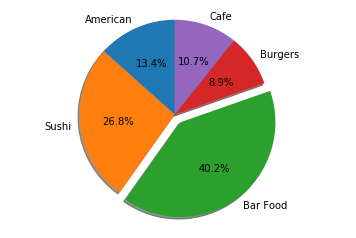

In [109]:
labels = 'American', 'Sushi', 'Bar Food', 'Burgers', 'Cafe'
sizes = [15, 30, 45, 10, 12]
explode = (0, 0, .1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()